In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for better visualization
from IPython.display import display 
from IPython.display import Markdown

#for statistical analyze
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu


In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

display(test.head(3))
display(train.head(3))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
display(Markdown("<span style='font-size:24px; color:white;'>Test dataset</span>"))
display(test.describe())
print(test.info())

<span style='font-size:24px; color:white;'>Test dataset</span>

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [4]:
display(Markdown("<span style='font-size:24px; color:white;'>Train dataset</span>"))
display(train.describe())
display(train.info())

<span style='font-size:24px; color:white;'>Train dataset</span>

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
test["Survived"] = np.nan

df = pd.concat([train, test], ignore_index=True)

display(df[-10:])
print(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


## Some statistics

In [6]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [7]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

In [8]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [9]:
display(df[df['Age'] == 0.170000])
display(df[df['Age'] == 80])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1245,1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [10]:
df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [11]:
print(df.SibSp.unique())
print()
print(df.SibSp.describe())


[1 0 3 4 2 5 8]

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64


In [12]:
print(df.Parch.unique())
print()
print(df.Parch.describe())


[0 1 2 5 3 4 6 9]

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64


## Here i want to check the difference between mean of age's and fare's

In [13]:
# The normality test
stat, p_age_f = shapiro(df[df['Sex'] == 'female']['Age'].dropna())
stat, p_age_m = shapiro(df[df['Sex'] == 'male']['Age'].dropna())

stat, p_fare_f = shapiro(df[df['Sex'] == 'female']['Fare'].dropna())
stat, p_fare_m = shapiro(df[df['Sex'] == 'male']['Fare'].dropna())

print(f"P-value for age (female): {round(p_age_f, 5)}")
print(f"P-value for age (male): {round(p_age_m, 5)}")
print(f"P-value for fare (female): {round(p_fare_f, 5)}")
print(f"P-value for fare (male): {round(p_fare_m, 5)}")


P-value for age (female): 8e-05
P-value for age (male): 0.0
P-value for fare (female): 0.0
P-value for fare (male): 0.0


#### Сonclusion the data is distributed abnormally
#### So we use the non-parametric statistic to test our hypothesis

In [14]:
#H0:Does the average age of men and women differ?

men = df[df.Sex == "male"] 
women = df[df.Sex == "female"]


stat, p = mannwhitneyu(men.Age, women.Age)
print('The criterion of significance = %.3f' % (p))

alpha = 0.1
if p > alpha:
  print('The age did not differ')
else:
  print('Really different ages, male ', 
        men.Age.mean(),', female ', women.Age.mean())

The criterion of significance = nan
Really different ages, male  30.58522796352584 , female  28.68708762886598


In [15]:
#H0:Are the average ticket prices different for men and women?

stat, p = mannwhitneyu(men.Fare, women.Fare)
print('The criterion of significance = %.3f' % (p))

alpha = 0.1
if p > alpha:
  print('The age did not differ')
else:
  print('Really different ages, male ', 
        men.Fare.mean(),', female ', women.Fare.mean())



The criterion of significance = nan
Really different ages, male  26.15460083135392 , female  46.1980965665236


#### The fare differs greatly, Let's see how they are distributed by cabin classes.

In [16]:
s = df.groupby(['Sex', 'Pclass'])['PassengerId'].count().reset_index()

f = s[s.Sex == 'female'].copy()
m = s[s.Sex == 'male'].copy()

f['ratio'] = f['PassengerId'] / f['PassengerId'].sum() * 100
m['ratio'] = m['PassengerId'] / m['PassengerId'].sum() * 100
display(f)
display(m)

,Sex,Pclass,PassengerId,ratio
0,female,1,144,30.901288
1,female,2,106,22.746781
2,female,3,216,46.351931


,Sex,Pclass,PassengerId,ratio
3,male,1,179,21.233689
4,male,2,171,20.284698
5,male,3,493,58.481613


#### Women preferred the first class more often than men.

In [17]:
df.Age = df.Age.fillna(df.Age.mean())
print(df.Age.describe())
drop_columns = ['Cabin','Name','Ticket','Embarked']
df = df.drop(columns=drop_columns, axis=1)

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64


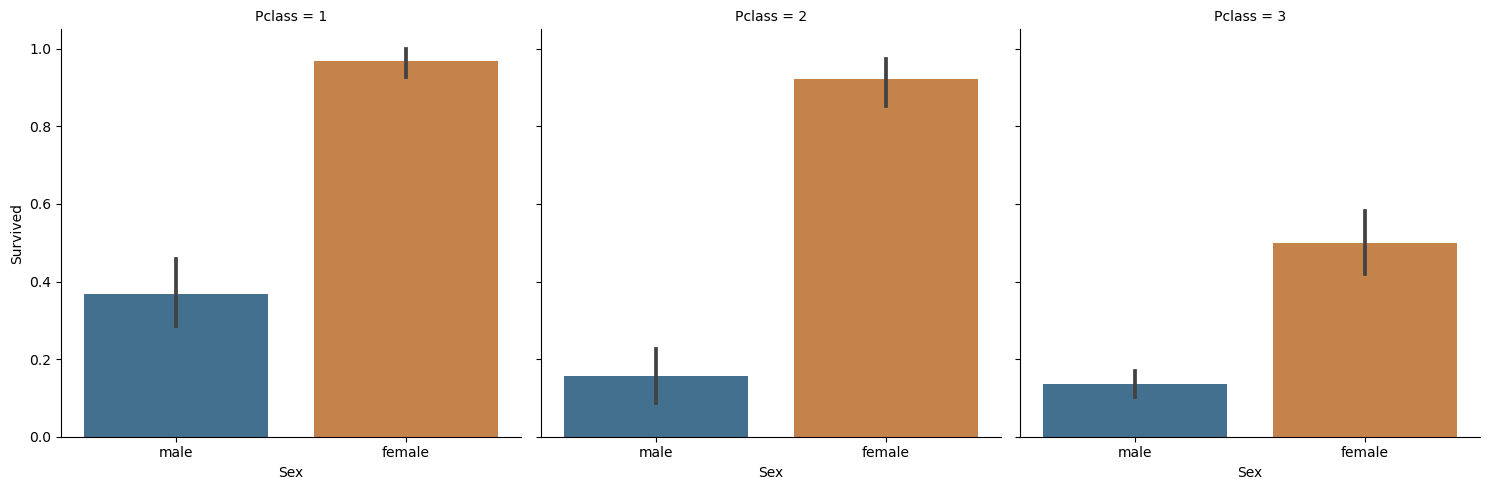

In [18]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

## In every class, women had a higher survival rate than men, highlighting the heroism of the men on board. As we previously noted, there were significantly more men overall. Additionally, we can see that first-class passengers had the highest survival rate.